In [40]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('C:\\Users\\KIRHIKAGURUMURTHY\\Desktop\\PES stuff\\Projects\\University_Ranking\\Datasets\\Twitter\\final_iitb.csv')
wn = nltk.WordNetLemmatizer()

In [10]:
df=df.drop(columns="index")
df

,hashtags,timestamp,text,screen_name,uni_handle,compound,Sentiment
0,['KathuaRape'],2019-06-08 19:45:56,The humanities department of @iitbombay had co...,ajhay9,0.0,-0.6369,Negative
1,[],2019-06-08 19:12:35,"iit bombay problem heard , which salt is good ...",satishgmatt,0.0,0.7003,Positive
2,[],2019-06-08 19:12:05,The energy burden that goes unaudited. Our wor...,ronitabardhan,0.0,-0.2023,Negative
3,[],2019-06-08 18:59:07,Dr. Puniyani is great and will fight for truth...,ChackoattukadJ,0.0,0.9300,Positive
4,"['microplastics', 'worldoceansday']",2019-06-08 18:17:58,The study of @iitbombay shows that every brand...,CitizenKamran,0.0,-0.7906,Negative
...,...,...,...,...,...,...,...
49081,[],2020-06-10 01:00:25,Time to talk with New Yorker's on Social Dista...,prjeusa,0.0,0.0000,Neutral
49082,[],2020-06-10 00:32:20,"IIT Bombay is India’s top university, says 202...",DrRahul_G,0.0,0.2023,Positive
49083,[],2020-06-10 00:30:22,from the abstract of this paper i have no idea...,jc96531326,0.0,-0.2960,Negative
49084,[],2020-06-10 00:17:39,That's a hella small sample size and a pretty ...,Techbropolis,0.0,0.2263,Positive


In [17]:
df['Timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format = "%d/%m/%Y", utc  = False)
df

,hashtags,timestamp,text,screen_name,uni_handle,compound,Sentiment,Timestamp,day,month
0,['KathuaRape'],2019-06-08 19:45:56,The humanities department of @iitbombay had co...,ajhay9,0.0,-0.6369,Negative,2019-06-08 19:45:56,8,6
1,[],2019-06-08 19:12:35,"iit bombay problem heard , which salt is good ...",satishgmatt,0.0,0.7003,Positive,2019-06-08 19:12:35,8,6
2,[],2019-06-08 19:12:05,The energy burden that goes unaudited. Our wor...,ronitabardhan,0.0,-0.2023,Negative,2019-06-08 19:12:05,8,6
3,[],2019-06-08 18:59:07,Dr. Puniyani is great and will fight for truth...,ChackoattukadJ,0.0,0.9300,Positive,2019-06-08 18:59:07,8,6
4,"['microplastics', 'worldoceansday']",2019-06-08 18:17:58,The study of @iitbombay shows that every brand...,CitizenKamran,0.0,-0.7906,Negative,2019-06-08 18:17:58,8,6
...,...,...,...,...,...,...,...,...,...,...
49081,[],2020-06-10 01:00:25,Time to talk with New Yorker's on Social Dista...,prjeusa,0.0,0.0000,Neutral,2020-06-10 01:00:25,10,6
49082,[],2020-06-10 00:32:20,"IIT Bombay is India’s top university, says 202...",DrRahul_G,0.0,0.2023,Positive,2020-06-10 00:32:20,10,6
49083,[],2020-06-10 00:30:22,from the abstract of this paper i have no idea...,jc96531326,0.0,-0.2960,Negative,2020-06-10 00:30:22,10,6
49084,[],2020-06-10 00:17:39,That's a hella small sample size and a pretty ...,Techbropolis,0.0,0.2263,Positive,2020-06-10 00:17:39,10,6


In [67]:
def giveday(timestamp):
    day_string = timestamp.day
    return day_string
def givemonth(timestamp):
    month_string = timestamp.month
    return month_string
def giveyear(timestamp):
    year_string = timestamp.year
    return year_string
df['day'] = df['Timestamp'].apply(giveday)
df['month'] = df['Timestamp'].apply(givemonth)
df['year'] = df['Timestamp'].apply(giveyear)
months = df.groupby('month')
monthcount = months['text'].count()
monthdict = monthcount.to_dict()

df["monthName"] = df.Timestamp.dt.month_name()

df["dayName"] = df.Timestamp.dt.day_name()
df


,hashtags,timestamp,text,screen_name,uni_handle,compound,Sentiment,Timestamp,day,month,year,monthName,dayName
0,['KathuaRape'],2019-06-08 19:45:56,The humanities department of @iitbombay had co...,ajhay9,0.0,-0.6369,Negative,2019-06-08 19:45:56,8,6,2019,June,Saturday
1,[],2019-06-08 19:12:35,"iit bombay problem heard , which salt is good ...",satishgmatt,0.0,0.7003,Positive,2019-06-08 19:12:35,8,6,2019,June,Saturday
2,[],2019-06-08 19:12:05,The energy burden that goes unaudited. Our wor...,ronitabardhan,0.0,-0.2023,Negative,2019-06-08 19:12:05,8,6,2019,June,Saturday
3,[],2019-06-08 18:59:07,Dr. Puniyani is great and will fight for truth...,ChackoattukadJ,0.0,0.9300,Positive,2019-06-08 18:59:07,8,6,2019,June,Saturday
4,"['microplastics', 'worldoceansday']",2019-06-08 18:17:58,The study of @iitbombay shows that every brand...,CitizenKamran,0.0,-0.7906,Negative,2019-06-08 18:17:58,8,6,2019,June,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49081,[],2020-06-10 01:00:25,Time to talk with New Yorker's on Social Dista...,prjeusa,0.0,0.0000,Neutral,2020-06-10 01:00:25,10,6,2020,June,Wednesday
49082,[],2020-06-10 00:32:20,"IIT Bombay is India’s top university, says 202...",DrRahul_G,0.0,0.2023,Positive,2020-06-10 00:32:20,10,6,2020,June,Wednesday
49083,[],2020-06-10 00:30:22,from the abstract of this paper i have no idea...,jc96531326,0.0,-0.2960,Negative,2020-06-10 00:30:22,10,6,2020,June,Wednesday
49084,[],2020-06-10 00:17:39,That's a hella small sample size and a pretty ...,Techbropolis,0.0,0.2263,Positive,2020-06-10 00:17:39,10,6,2020,June,Wednesday


In [71]:
session2019 = df[df['year'] == 2019]
session2020 = df[df['year'] == 2020]
months2019=session2019.groupby('month')
monthcount2019 = months2019['text'].count()
monthdict2019=monthcount2019.to_dict()
months2020=session2020.groupby('month')
monthcount2020 = months2020['text'].count()
monthdict2020=monthcount2020.to_dict()

In [72]:
monthdict2019

{6: 1216, 7: 1922, 8: 1566, 9: 1726, 10: 1278, 11: 2222, 12: 6535}

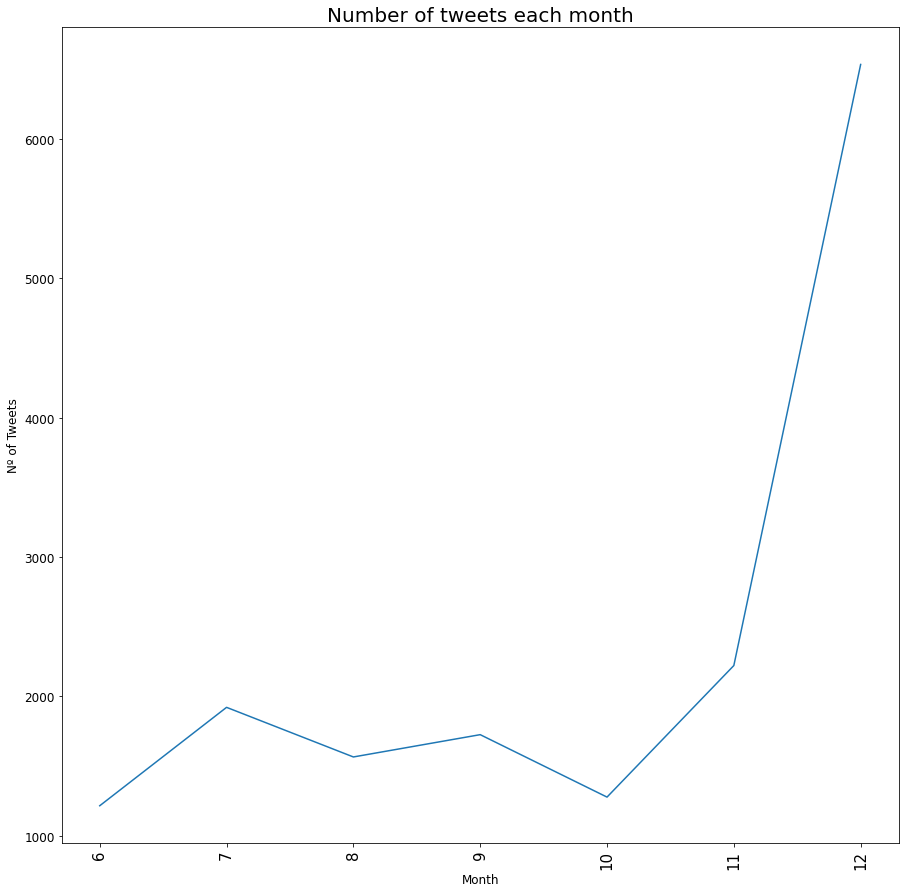

In [73]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(monthdict2019.keys()), list(monthdict2019.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [23]:
grouped = session2019.groupby('month')

In [24]:
June2019 = grouped.get_group(6)
July2019 = grouped.get_group(7)
Aug2019 = grouped.get_group(8)
Sept2019 = grouped.get_group(9)
Oct2019 = grouped.get_group(10)
Nov2019 = grouped.get_group(11)
Dec2019 = grouped.get_group(12)

In [25]:
days_June2019 = June2019.groupby('day')
daycount_June2019 = days_June2019['text'].count()
timedict_June2019 = daycount_June2019.to_dict()

days_July2019 = July2019.groupby('day')
daycount_July2019 = days_July2019['text'].count()
timedict_July2019 = daycount_July2019.to_dict()

days_Aug2019 = Aug2019.groupby('day')
daycount_Aug2019 = days_Aug2019['text'].count()
timedict_Aug2019 = daycount_Aug2019.to_dict()

days_Sept2019 = Sept2019.groupby('day')
daycount_Sept2019 = days_Sept2019['text'].count()
timedict_Sept2019 = daycount_Sept2019.to_dict()

days_Oct2019 =Oct2019.groupby('day')
daycount_Oct2019 = days_Oct2019['text'].count()
timedict_Oct2019 = daycount_Oct2019.to_dict()

days_Nov2019 = Nov2019.groupby('day')
daycount_Nov2019 = days_Nov2019['text'].count()
timedict_Nov2019 = daycount_Nov2019.to_dict()

days_Dec2019 = Dec2019.groupby('day')
daycount_Dec2019 = days_Dec2019['text'].count()
timedict_Dec2019 = daycount_Dec2019.to_dict()

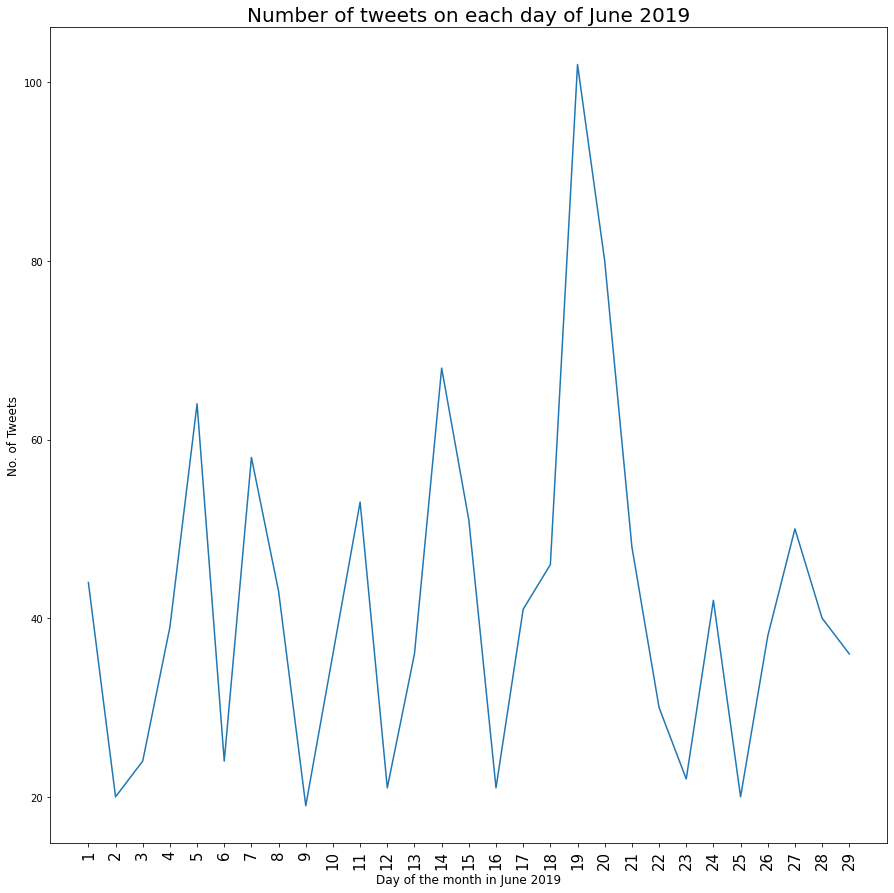

In [28]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June2019.keys()), list(timedict_June2019.values()))
plt.xlabel('Day of the month in June 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June 2019', fontsize = 20)
plt.show()

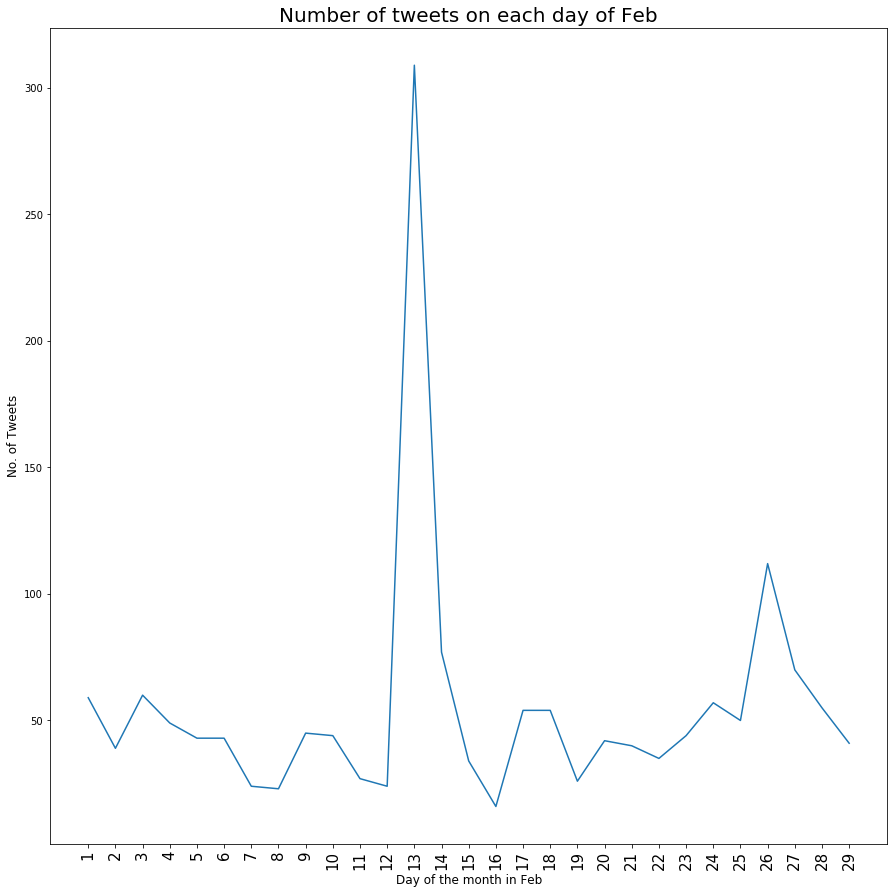

In [17]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_July2019.keys()), list(timedict_July2019.values()))
plt.xlabel('Day of the month in July 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_July2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of July 2019', fontsize = 20)
plt.show()

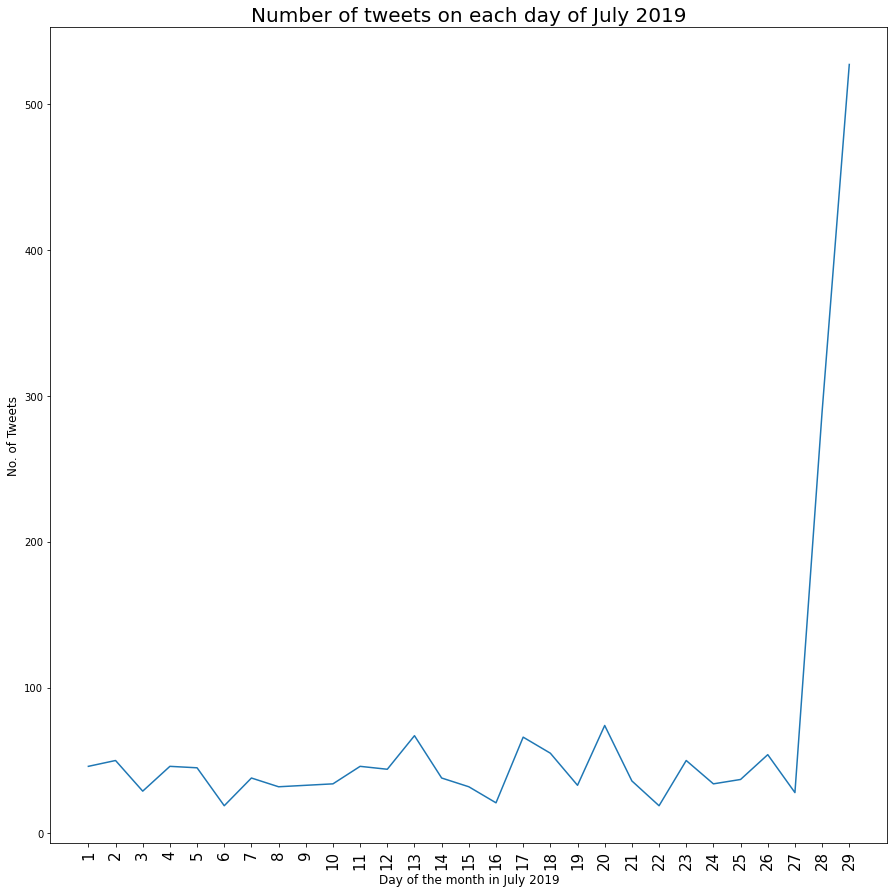

In [29]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_July2019.keys()), list(timedict_July2019.values()))
plt.xlabel('Day of the month in July 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_July2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of July 2019', fontsize = 20)
plt.show()

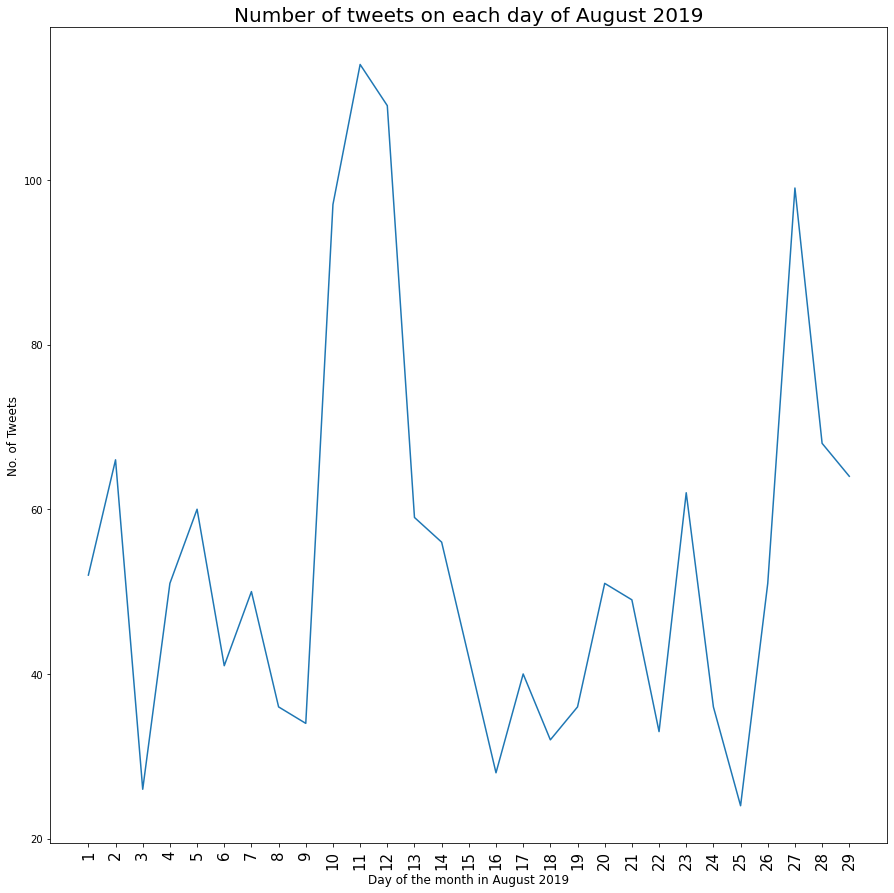

In [30]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Aug2019.keys()), list(timedict_Aug2019.values()))
plt.xlabel('Day of the month in August 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Aug2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of August 2019', fontsize = 20)
plt.show()


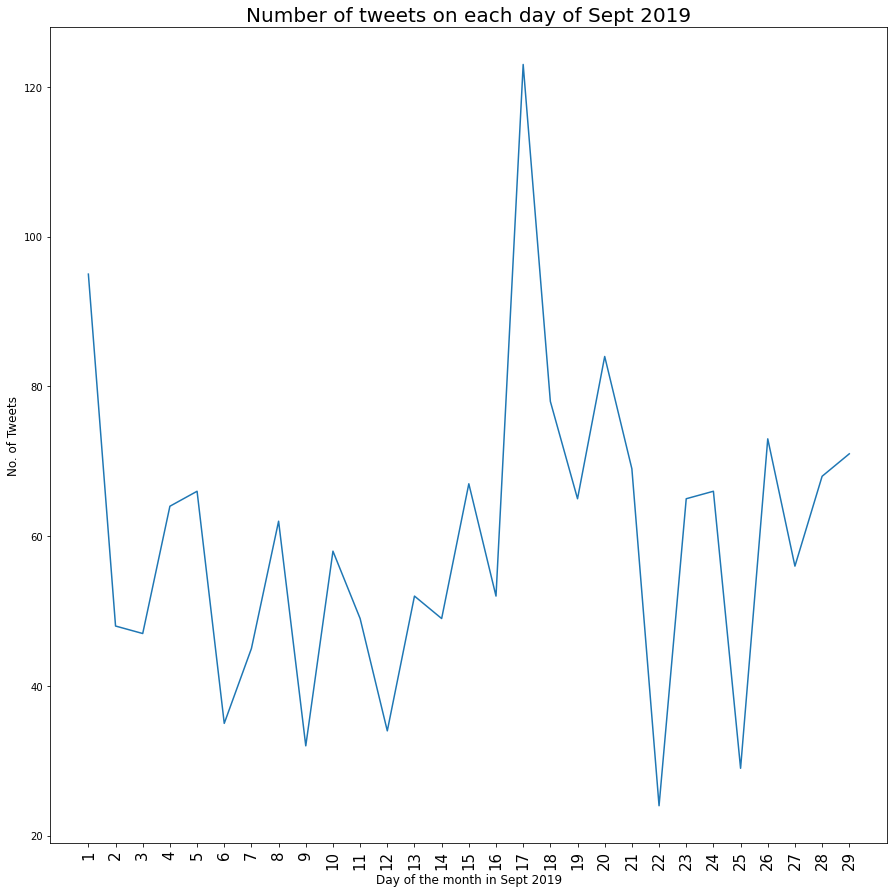

In [31]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Sept2019.keys()), list(timedict_Sept2019.values()))
plt.xlabel('Day of the month in Sept 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Sept2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Sept 2019', fontsize = 20)
plt.show()

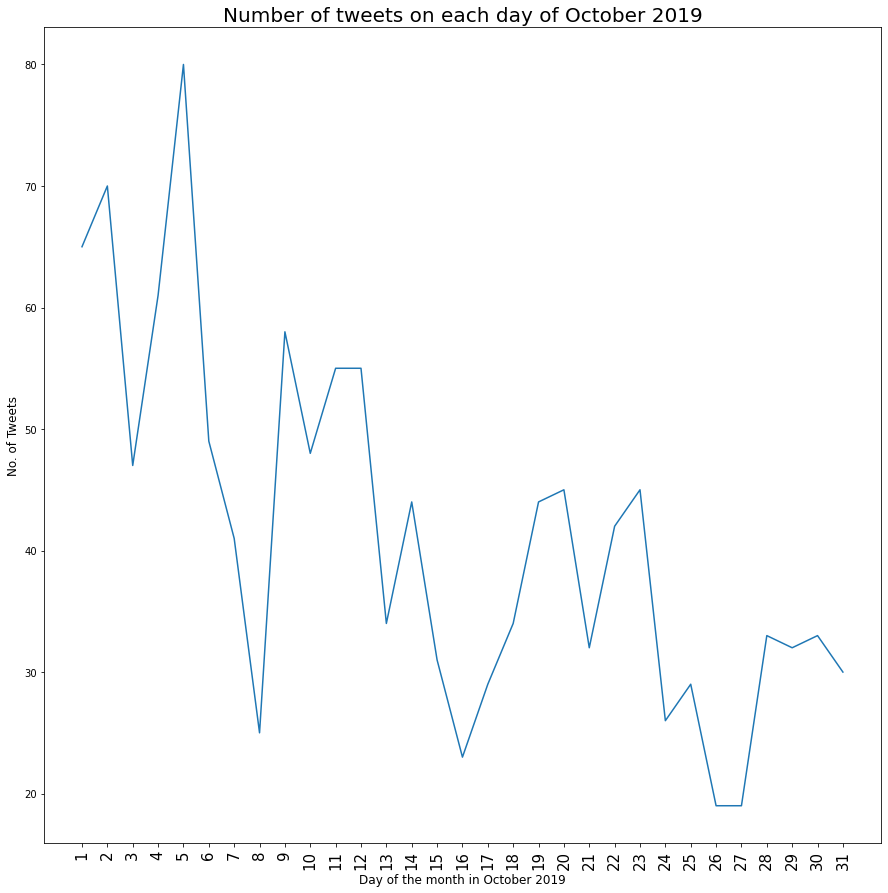

In [32]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Oct2019.keys()), list(timedict_Oct2019.values()))
plt.xlabel('Day of the month in October 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Oct2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of October 2019', fontsize = 20)
plt.show()

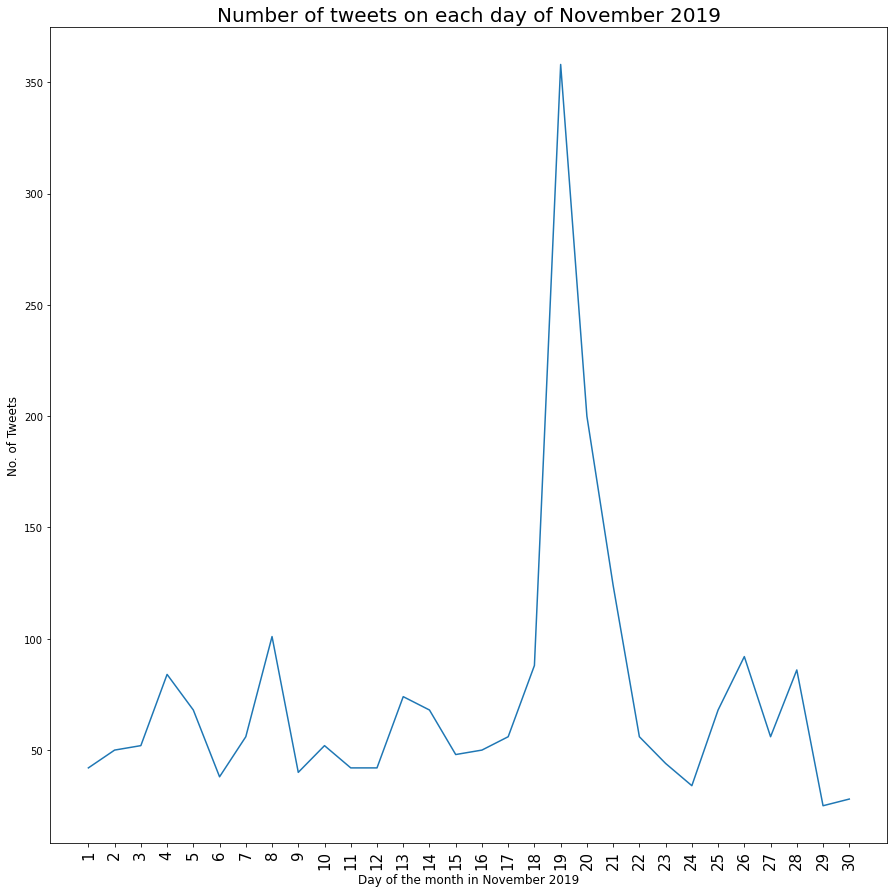

In [33]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Nov2019.keys()), list(timedict_Nov2019.values()))
plt.xlabel('Day of the month in November 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Nov2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of November 2019', fontsize = 20)
plt.show()

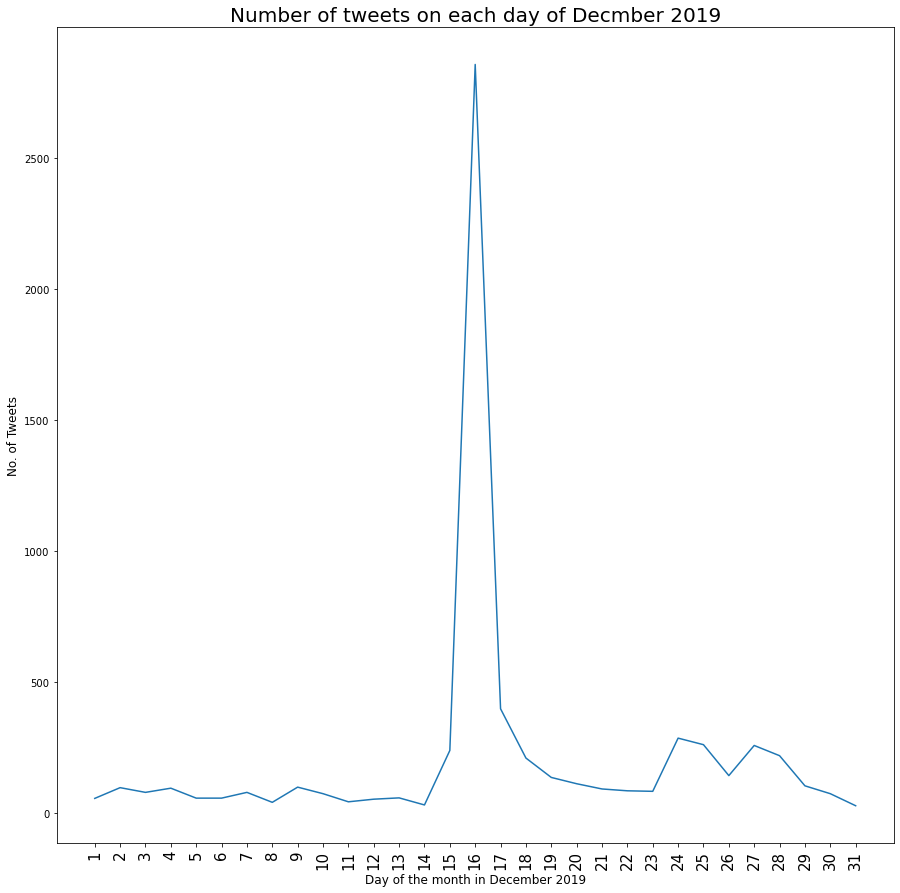

In [34]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Dec2019.keys()), list(timedict_Dec2019.values()))
plt.xlabel('Day of the month in December 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Dec2019.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Decmber 2019', fontsize = 20)
plt.show()

In [35]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


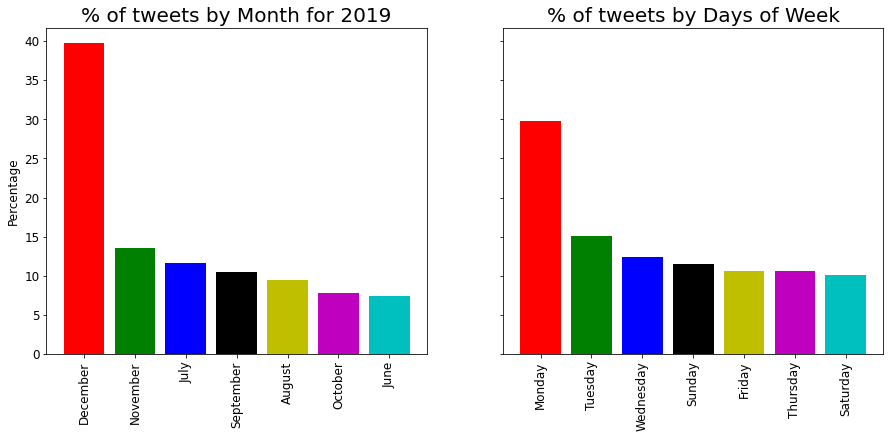

In [56]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = session2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month for 2019')

session2019["dayName"] = session2019.Timestamp.dt.day_name()
data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


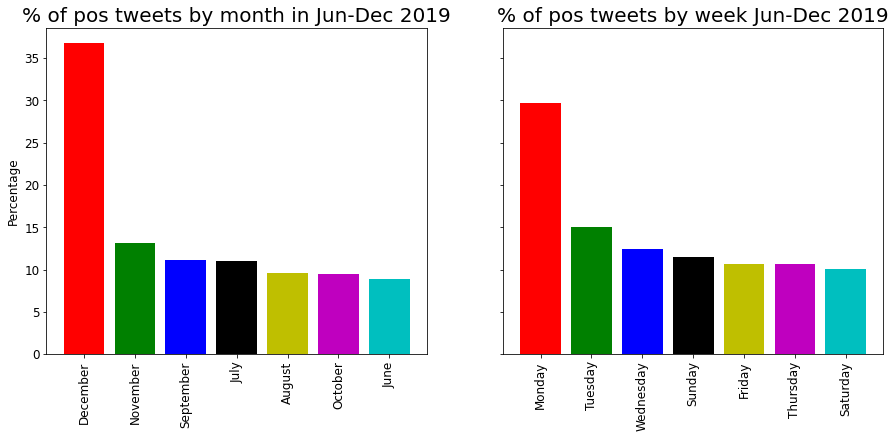

In [76]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = session2019[session2019.Sentiment == 'Positive']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


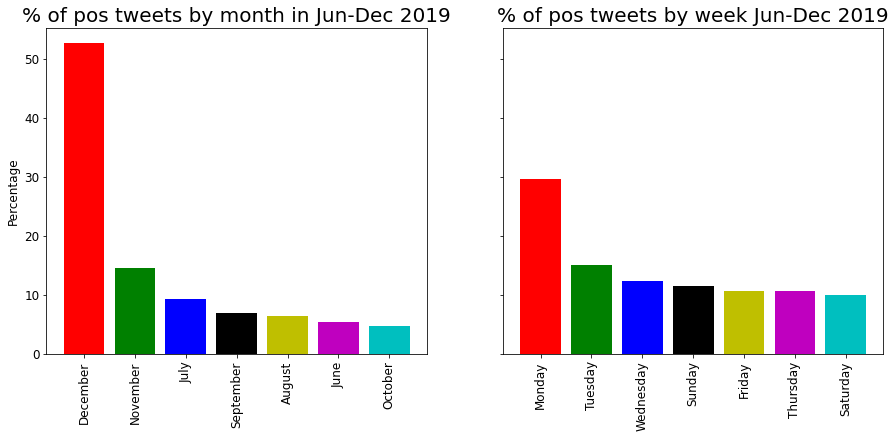

In [77]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = session2019[session2019.Sentiment == 'Negative']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = session2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

In [78]:
pos_df2019 = session2019[session2019.Sentiment == 'Positive']
neg_df2019 = session2019[session2019.Sentiment == 'Negative']
neu_df2019 =session2019[session2019.Sentiment == 'Neutral']
pos_df2020 = session2020[session2020.Sentiment == 'Positive']
neg_df2020 = session2020[session2020.Sentiment == 'Negative']
neu_df2020 =session2020[session2020.Sentiment == 'Neutral']

In [87]:
senti2019 = pos_df2019.groupby('month')
senticount2019 = senti2019['text'].count()
sentidict2019 = senticount2019.to_dict()

senti2019neg = neg_df2019.groupby('month')
senticount2019neg = senti2019neg['text'].count()
sentidict2019neg = senticount2019neg.to_dict()

senti2019neu = neu_df2019.groupby('month')
senticount2019neu = senti2019neu['text'].count()
sentidict2019neu = senticount2019neu.to_dict()



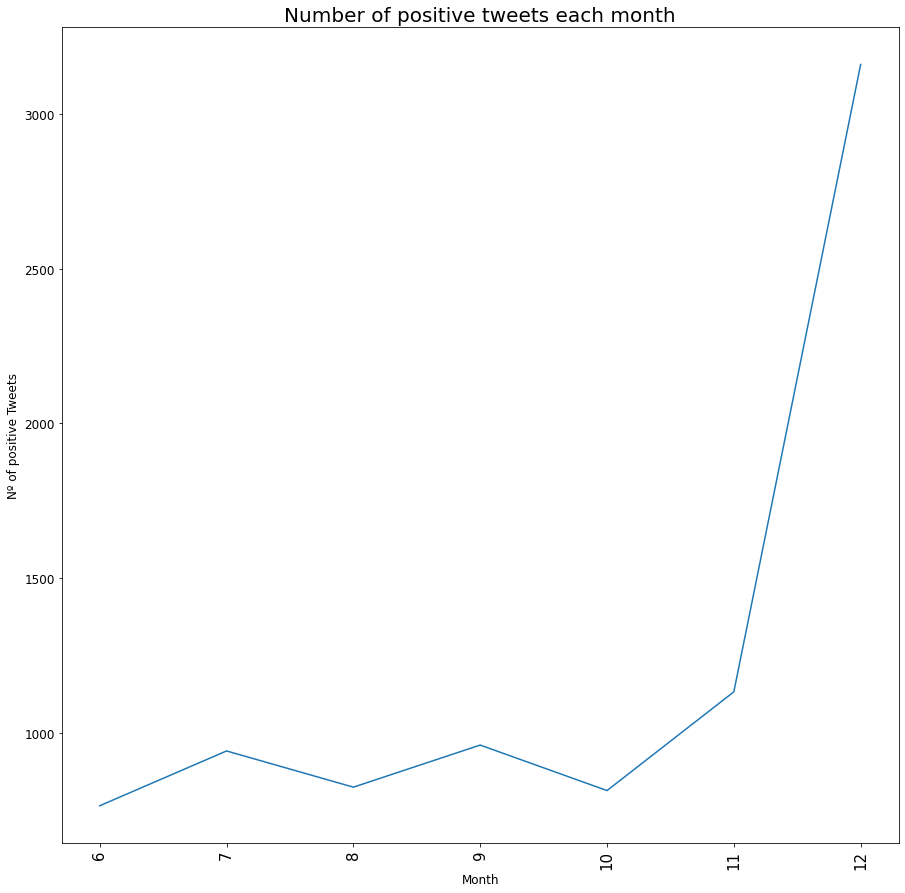

In [86]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019.keys()), list(sentidict2019.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of positive Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of positive tweets each month', fontsize = 20)
plt.show()


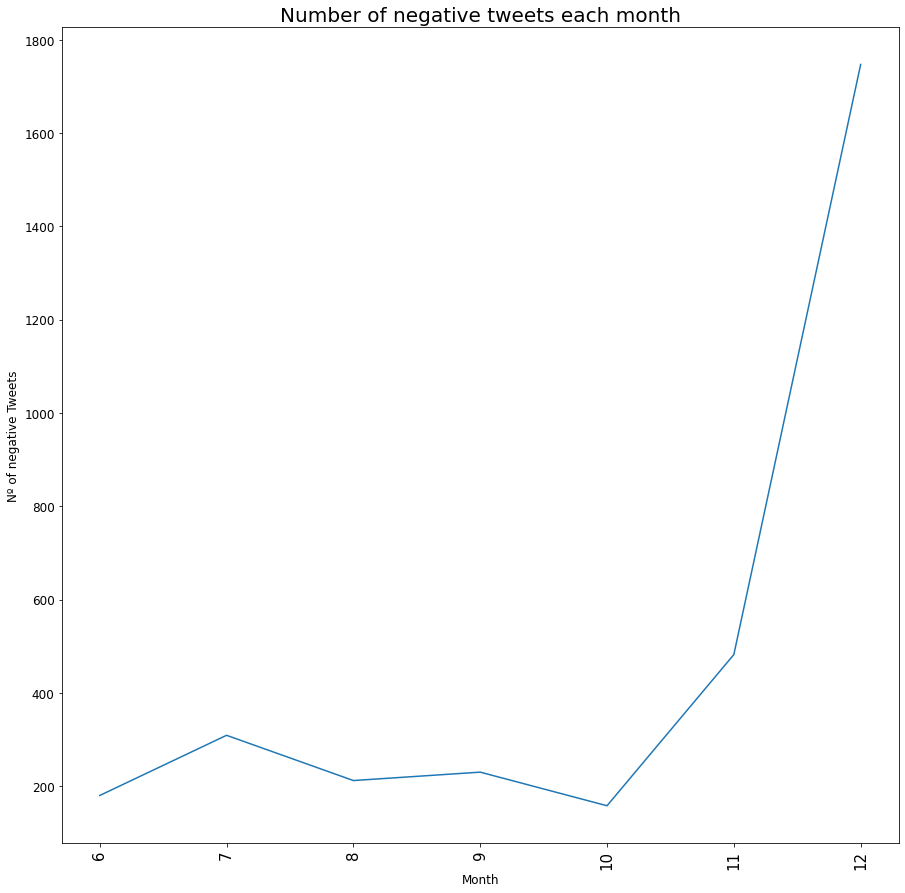

In [88]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019neg.keys()), list(sentidict2019neg.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of negative Tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Number of negative tweets each month', fontsize = 20)
plt.show()

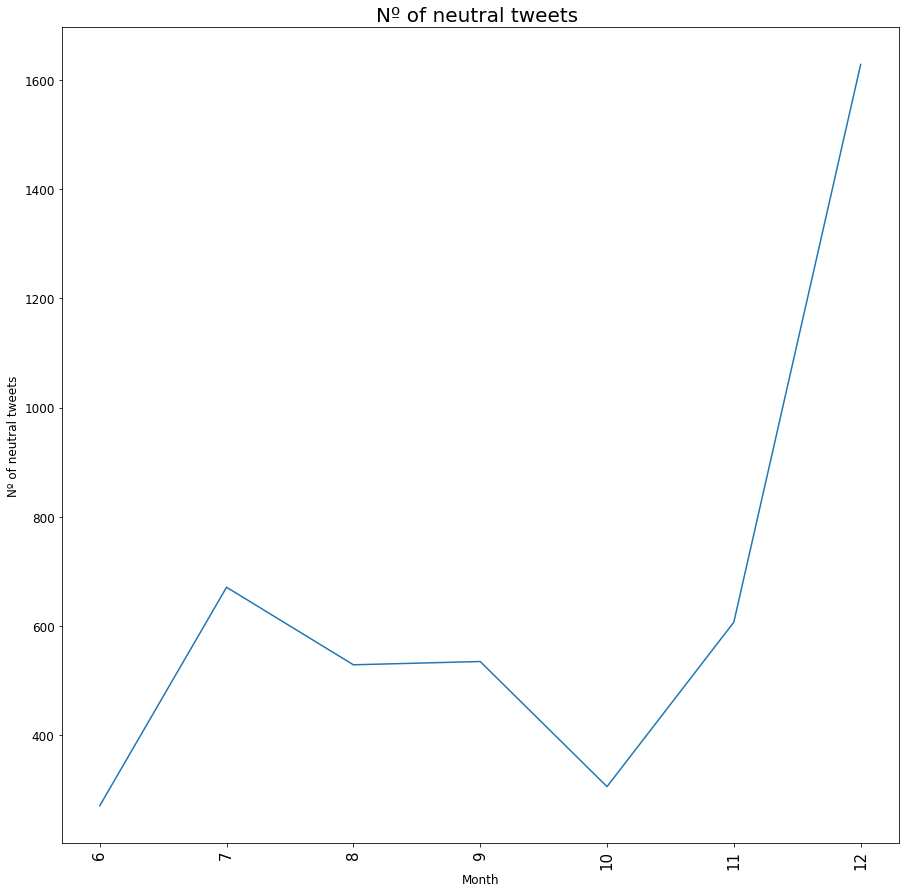

In [96]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2019neu.keys()),list(sentidict2019neu.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of neutral tweets', fontsize=12)
plt.xticks(list(monthdict2019.keys()), fontsize=15, rotation=90)
plt.title('Nº of neutral tweets ', fontsize = 20)
plt.show()

In [98]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))


In [102]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

session2019f = df[df['year'] == 2019]
session2020f = df[df['year'] == 2020]

In [104]:
wordfreq = {}
for sentence in session2019f['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [105]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('iit', 8477),
 ('iitbombay', 8424),
 ('bombay', 6874),
 ('student', 4006),
 ('india', 1783),
 ('university', 1518),
 ('protest', 1012),
 ('iitmadras', 1002),
 ('iitdelhi', 971),
 ('jamiaprotest', 869),
 ('th', 826),
 ('mumbai', 811),
 ('u', 791),
 ('delhi', 791),
 ('jamiamilia', 789),
 ('jamia', 757),
 ('cabprotests', 747),
 ('indian', 743),
 ('day', 679),
 ('one', 616),
 ('jnu', 610),
 ('institute', 609),
 ('prof', 592),
 ('support', 587),
 ('like', 585),
 ('also', 567),
 ('please', 548),
 ('year', 545),
 ('time', 545),
 ('r', 529),
 ('get', 528),
 ('workshop', 513),
 ('dont', 507),
 ('campus', 501),
 ('cow', 500),
 ('iitkgp', 497),
 ('people', 495),
 ('know', 491),
 ('top', 489),
 ('research', 489),
 ('great', 485),
 ('world', 480),
 ('today', 478),
 ('see', 436),
 ('iitkanpur', 433),
 ('pmoindia', 422),
 ('science', 416),
 ('hrdministry', 415),
 ('caa', 415),
 ('education', 407),
 ('technology', 405),
 ('sir', 399),
 ('startup', 395),
 ('college', 394),
 ('country', 392),
 ('congr

In [107]:
most_freq = sorted_wordfreq[0:20]
most_freq

[('iit', 8477),
 ('iitbombay', 8424),
 ('bombay', 6874),
 ('student', 4006),
 ('india', 1783),
 ('university', 1518),
 ('protest', 1012),
 ('iitmadras', 1002),
 ('iitdelhi', 971),
 ('jamiaprotest', 869),
 ('th', 826),
 ('mumbai', 811),
 ('u', 791),
 ('delhi', 791),
 ('jamiamilia', 789),
 ('jamia', 757),
 ('cabprotests', 747),
 ('indian', 743),
 ('day', 679),
 ('one', 616)]

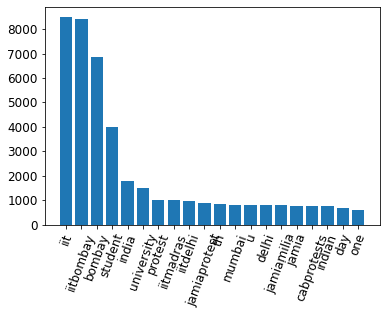

In [108]:
plt.bar(range(len(most_freq)), [val[1] for val in most_freq], align='center')
plt.xticks(range(len(most_freq)), [val[0] for val in most_freq])
plt.xticks(rotation=70)
plt.show()

In [109]:
df['hashtags'].str.replace('[\[,\]]', '')

0                            'KathuaRape'
1                                        
2                                        
3                                        
4        'microplastics' 'worldoceansday'
                       ...               
49081                                    
49082                                    
49083                                    
49084                                    
49085                          'SARSCov2'
Name: hashtags, Length: 49086, dtype: object

In [112]:
hashtagfreq = {}
for sentence in session2019f['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq.keys():
            hashtagfreq[token] = 1
        else:
            hashtagfreq[token] +=1

In [113]:
sorted_hashtag=sorted(hashtagfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag

[("'", 30347),
 (',', 22788),
 ('[', 16465),
 (']', 16465),
 ("'IITBombay", 2980),
 ("'JamiaProtest", 866),
 ("'JamiaMilia", 779),
 ("'CABProtests", 708),
 ("'iitbombay", 561),
 ("'AligarhMuslimUniversity", 383),
 ("'AMUprotest", 290),
 ("'IIT", 279),
 ("'DelhiBurning", 247),
 ("'Jamia", 227),
 ("'BJPburningIndia", 207),
 ("'DelhiProtest", 201),
 ("'ShameOnDelhiPolice", 197),
 ("'IndiaToEndia", 188),
 ("'JamiaProtests", 184),
 ("'AMU", 170),
 ("'StandWithJamia", 159),
 ("'Mumbai", 154),
 ("'ISupportDelhiPolice", 153),
 ("'India", 152),
 ("'BJPburningDelhi", 150),
 ("'JNU", 148),
 ("'CAAProtests", 146),
 ("'MicrofluidicsAMR", 138),
 ("'HindusAgainstCAB", 134),
 ("'ResignAmitShah", 122),
 ("'CABBill2019", 102),
 ("'DelhiPolice", 97),
 ("'IITMadras", 96),
 ("'moodindigo", 94),
 ("'CABPolitics", 94),
 ("'CAA2019", 91),
 ("'BHU", 89),
 ("'CAB", 86),
 ("'iit", 80),
 ("'TISS", 80),
 ("'SaveIndia", 80),
 ("'BlackDay", 79),
 ("'MoodIndigo", 79),
 ("'IITDelhi", 75),
 ("'startups", 71),
 ("'AMUSt

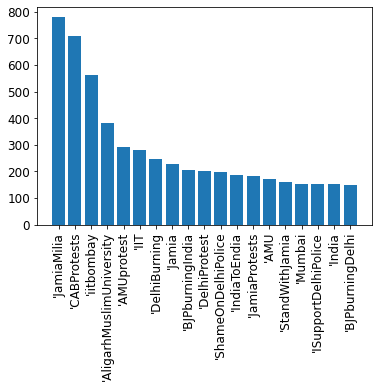

In [114]:
most_freqht = sorted_hashtag[6:25]
plt.bar(range(len(most_freqht)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()

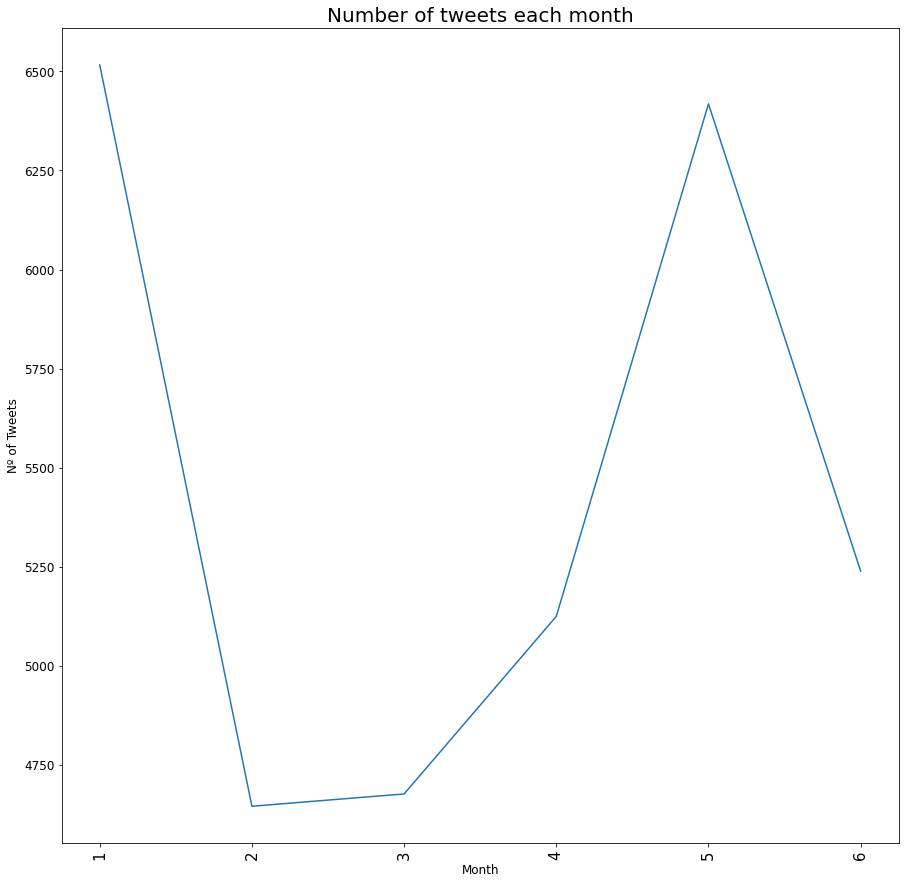

In [115]:
#2020
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(monthdict2020.keys()), list(monthdict2020.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [116]:
grouped2 = session2020.groupby('month')
Jan2020 = grouped2.get_group(1)
Feb2020 = grouped2.get_group(2)
Mar2020 = grouped2.get_group(3)
Apr2020 = grouped2.get_group(4)
May2020 = grouped2.get_group(5)
June2020 = grouped2.get_group(6)


In [117]:
days_Jan2020 = Jan2020.groupby('day')
daycount_Jan2020 = days_Jan2020['text'].count()
timedict_Jan2020 = daycount_Jan2020.to_dict()

days_Feb2020 = Feb2020.groupby('day')
daycount_Feb2020 = days_Feb2020['text'].count()
timedict_Feb2020 = daycount_Feb2020.to_dict()

days_Mar2020 = Mar2020.groupby('day')
daycount_Mar2020 = days_Mar2020['text'].count()
timedict_Mar2020 = daycount_Mar2020.to_dict()

days_Apr2020 = Apr2020.groupby('day')
daycount_Apr2020 = days_Apr2020['text'].count()
timedict_Apr2020 = daycount_Apr2020.to_dict()

days_May2020 =May2020.groupby('day')
daycount_May2020 = days_May2020['text'].count()
timedict_May2020 = daycount_May2020.to_dict()

days_June2020 = June2020.groupby('day')
daycount_June2020 = days_June2020['text'].count()
timedict_June2020 = daycount_June2020.to_dict()

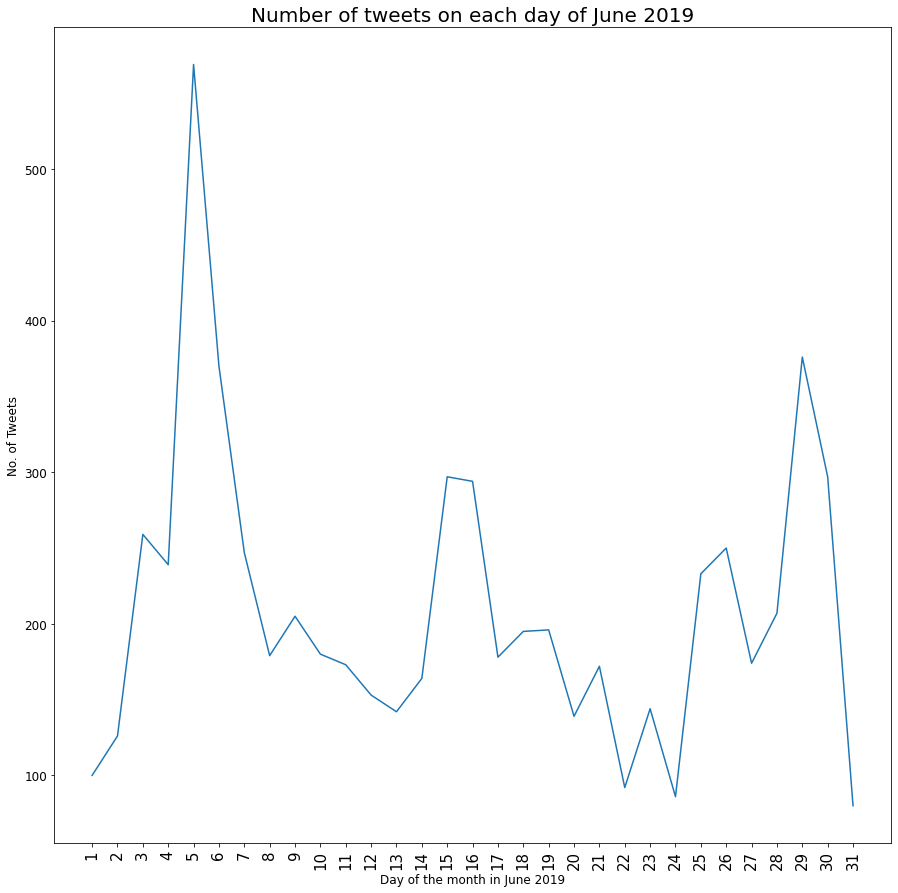

In [118]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Jan2020.keys()), list(timedict_Jan2020.values()))
plt.xlabel('Day of the month in June 2019', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Jan2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June 2019', fontsize = 20)
plt.show()

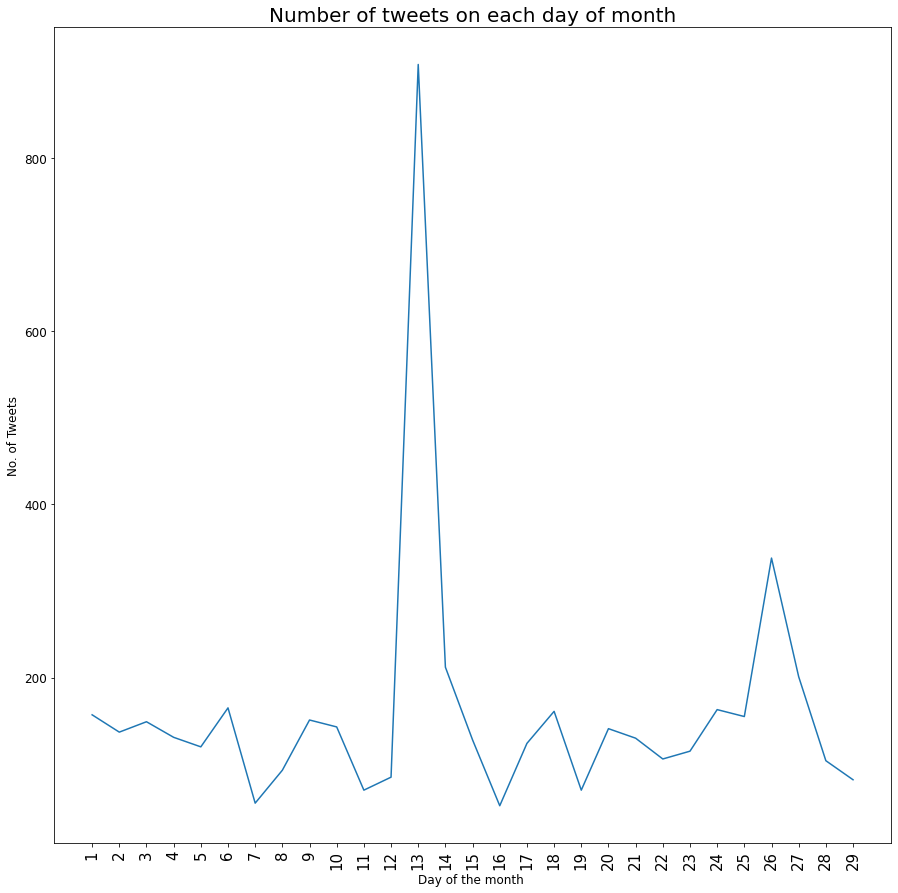

In [119]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Feb2020.keys()), list(timedict_Feb2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Feb2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

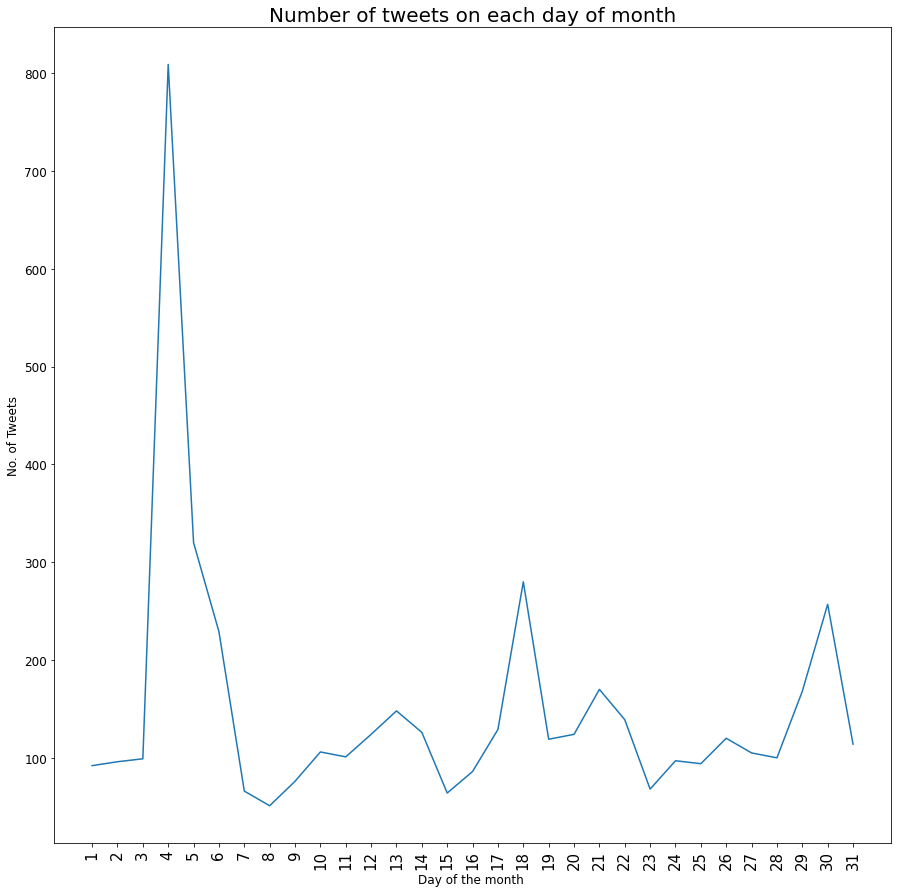

In [120]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Mar2020.keys()), list(timedict_Mar2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Mar2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

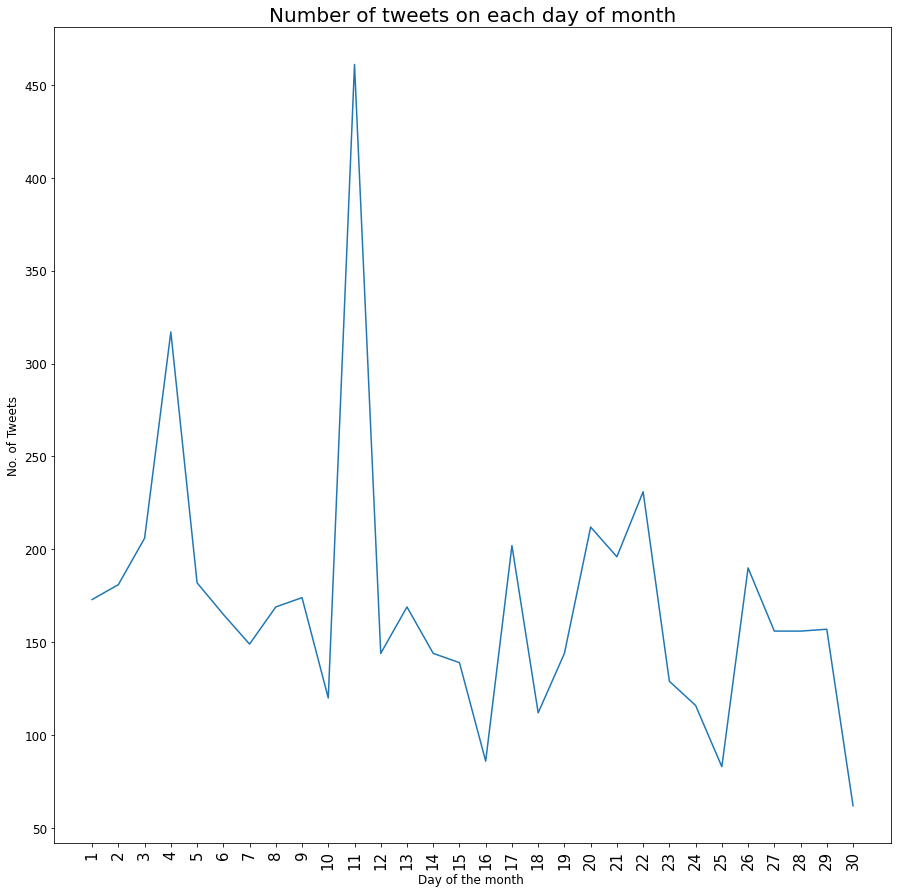

In [121]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Apr2020.keys()), list(timedict_Apr2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Apr2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

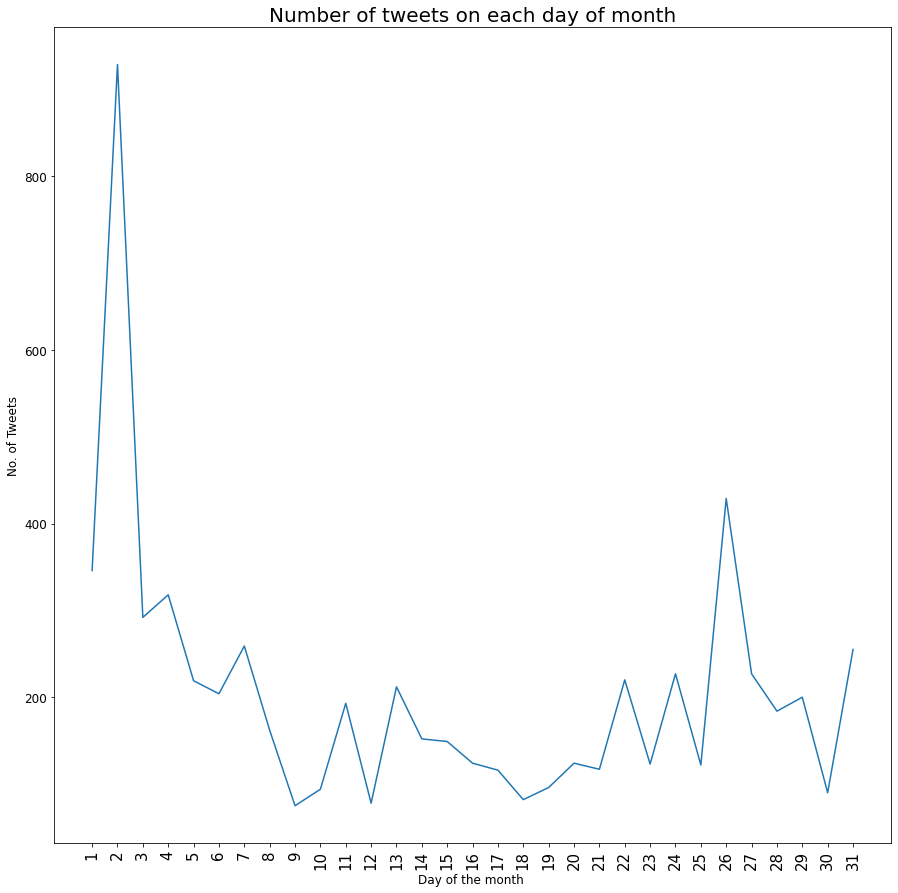

In [122]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_May2020.keys()), list(timedict_May2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_May2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

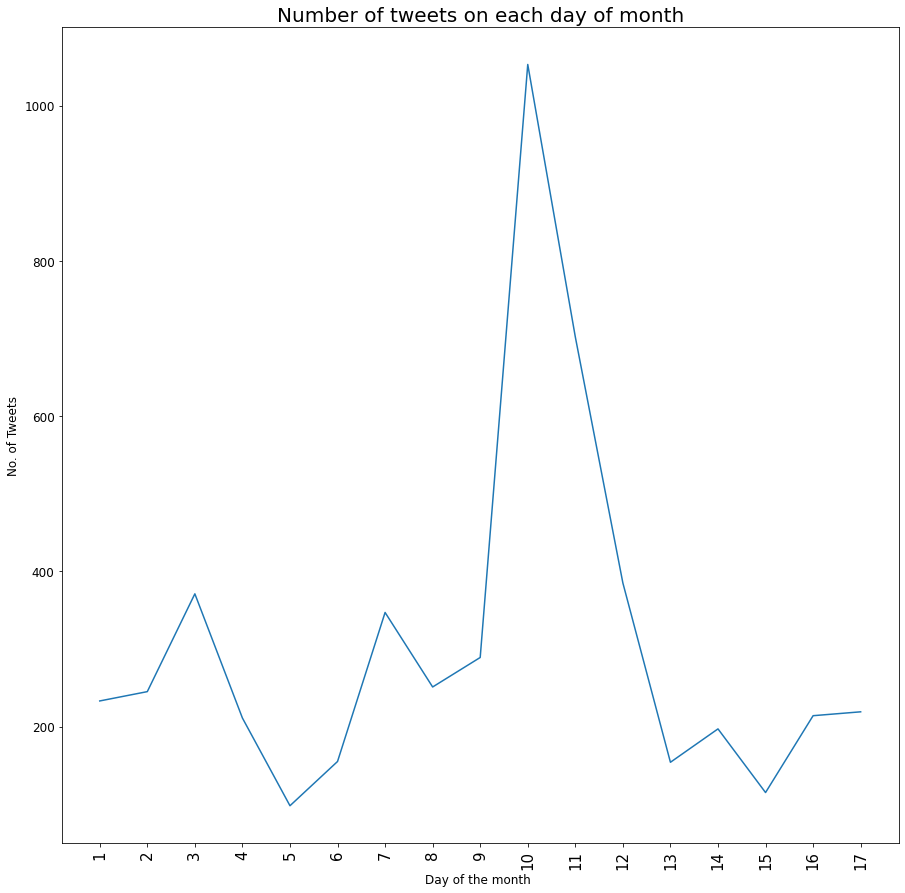

In [123]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June2020.keys()), list(timedict_June2020.values()))
plt.xlabel('Day of the month ', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June2020.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of month', fontsize = 20)
plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


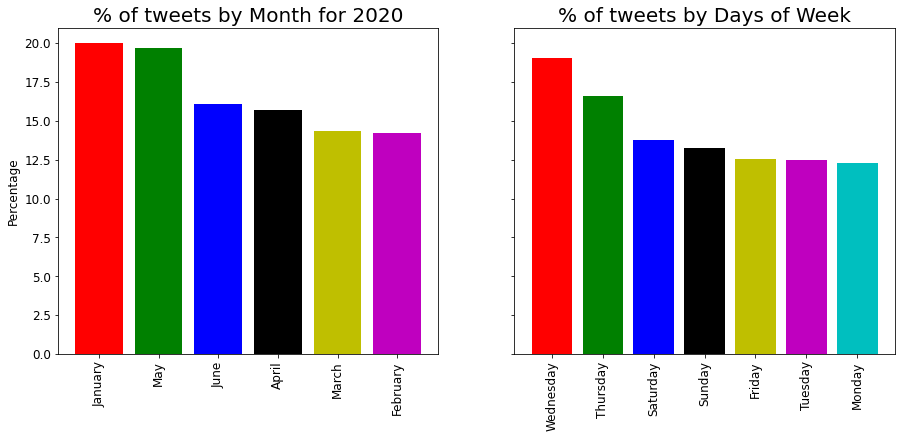

In [127]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = session2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month for 2020')

session2020["dayName"] = session2020.Timestamp.dt.day_name()
data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()


C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


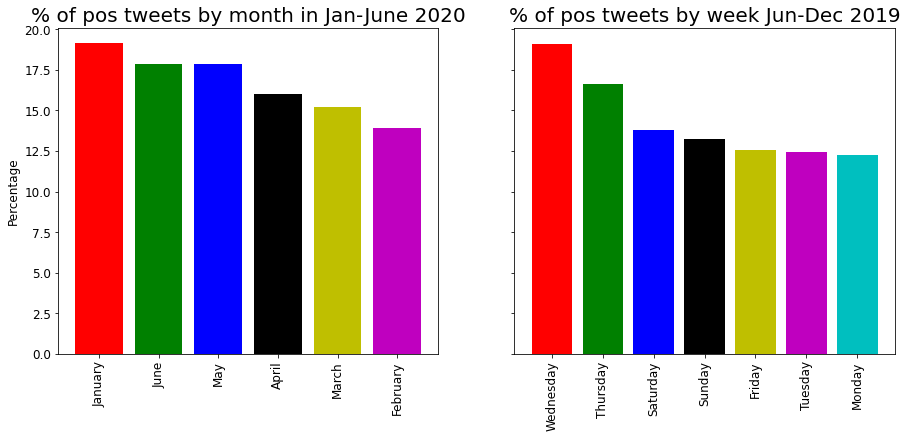

In [128]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2020 = session2020[session2020.Sentiment == 'Positive']
data = pos_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-June 2020')

data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """
C:\Users\KIRHIKAGURUMURTHY\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


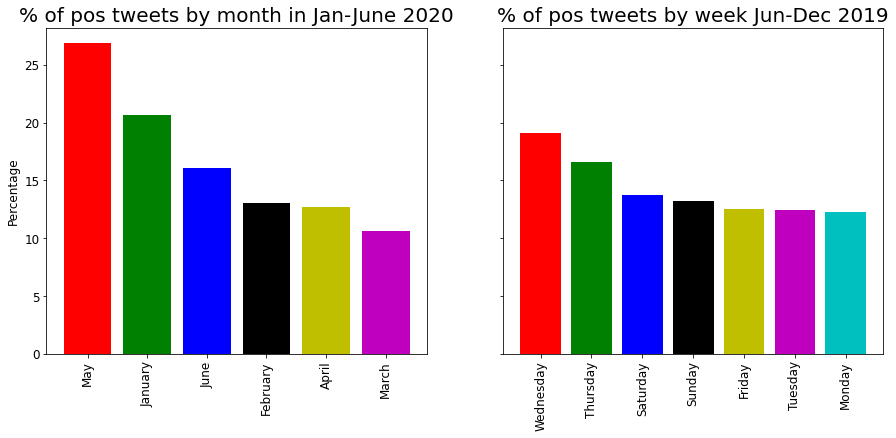

In [129]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2020 = session2020[session2020.Sentiment == 'Negative']
data = neg_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-June 2020')

data = session2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

In [131]:
senti2020 = pos_df2020.groupby('month')
senticount2020 = senti2020['text'].count()
sentidict2020 = senticount2020.to_dict()

senti2020neg = neg_df2020.groupby('month')
senticount2020neg = senti2020neg['text'].count()
sentidict2020neg = senticount2020neg.to_dict()

senti2020neu = neu_df2020.groupby('month')
senticount2020neu = senti2020neu['text'].count()
sentidict2020neu = senticount2020neu.to_dict()



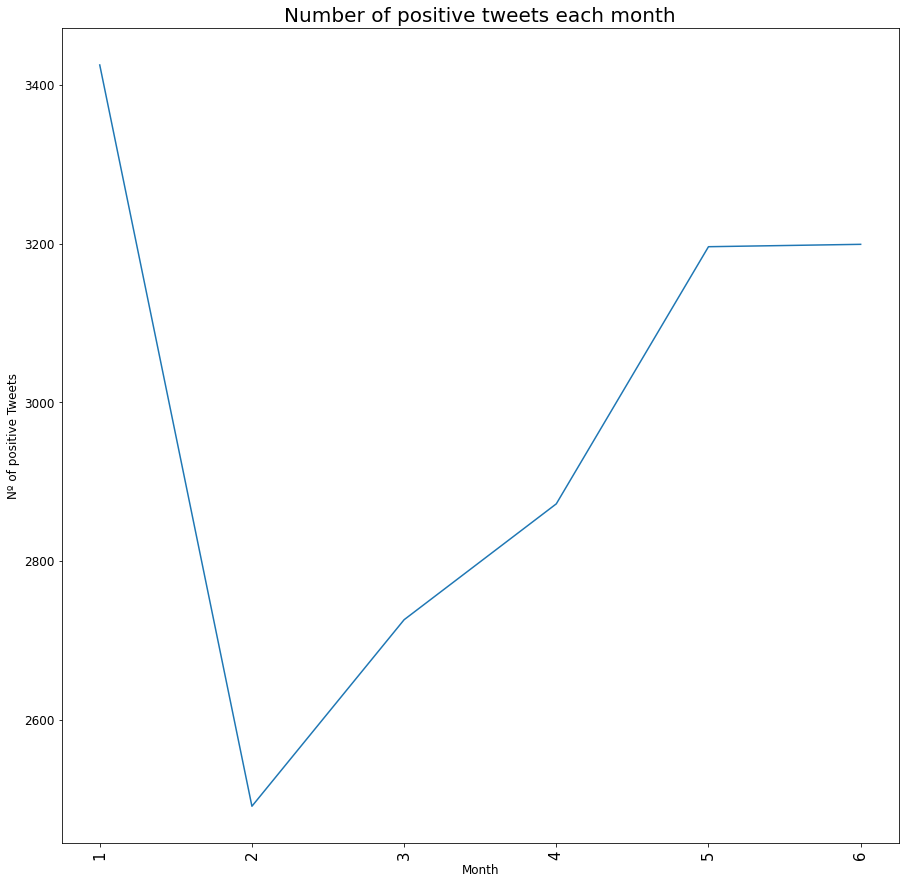

In [132]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2020.keys()), list(sentidict2020.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of positive Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of positive tweets each month', fontsize = 20)
plt.show()


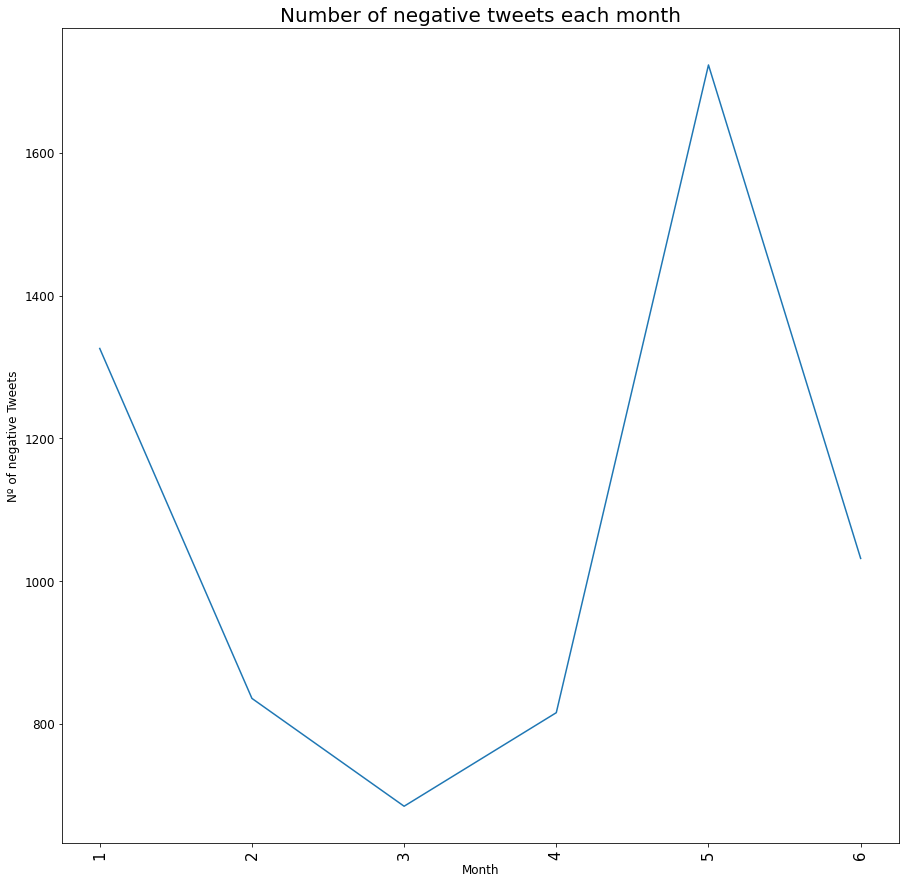

In [135]:
fig, axes = plt.subplots(figsize=(15,15))
plt.plot(list(sentidict2020neg.keys()), list(sentidict2020neg.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of negative Tweets', fontsize=12)
plt.xticks(list(monthdict2020.keys()), fontsize=15, rotation=90)
plt.title('Number of negative tweets each month', fontsize = 20)
plt.show()

In [137]:
wordfreq2020 = {}
for sentence in session2020f['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq2020.keys():
            wordfreq2020[token] = 1
        else:
            wordfreq2020[token] += 1

In [138]:
sorted_wordfreq2020=sorted(wordfreq2020.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq2020

[('iit', 16142),
 ('bombay', 13291),
 ('iitbombay', 11398),
 ('student', 6621),
 ('exam', 2977),
 ('india', 2927),
 ('university', 2729),
 ('iitdelhi', 2336),
 ('u', 2069),
 ('please', 1854),
 ('iitmadras', 1842),
 ('covid', 1665),
 ('indian', 1529),
 ('like', 1527),
 ('sir', 1513),
 ('iitkgp', 1410),
 ('iitkanpur', 1389),
 ('time', 1363),
 ('mumbai', 1348),
 ('year', 1291),
 ('one', 1262),
 ('top', 1248),
 ('help', 1244),
 ('dont', 1207),
 ('institute', 1205),
 ('people', 1183),
 ('technology', 1174),
 ('college', 1122),
 ('world', 1101),
 ('also', 1077),
 ('th', 1076),
 ('engineering', 1075),
 ('today', 1042),
 ('day', 1035),
 ('even', 1017),
 ('life', 1008),
 ('pmoindia', 998),
 ('know', 988),
 ('prof', 973),
 ('science', 950),
 ('want', 950),
 ('hrdministry', 929),
 ('research', 927),
 ('great', 910),
 ('delhi', 904),
 ('get', 898),
 ('need', 889),
 ('team', 888),
 ('take', 879),
 ('ranking', 869),
 ('work', 866),
 ('institution', 862),
 ('many', 851),
 ('kanpur', 842),
 ('iits', 8

In [139]:
most_freq2020 = sorted_wordfreq2020[0:20]
most_freq2020

[('iit', 16142),
 ('bombay', 13291),
 ('iitbombay', 11398),
 ('student', 6621),
 ('exam', 2977),
 ('india', 2927),
 ('university', 2729),
 ('iitdelhi', 2336),
 ('u', 2069),
 ('please', 1854),
 ('iitmadras', 1842),
 ('covid', 1665),
 ('indian', 1529),
 ('like', 1527),
 ('sir', 1513),
 ('iitkgp', 1410),
 ('iitkanpur', 1389),
 ('time', 1363),
 ('mumbai', 1348),
 ('year', 1291)]

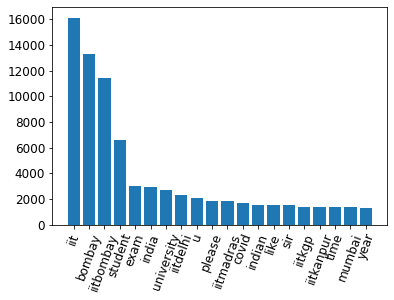

In [140]:
plt.bar(range(len(most_freq2020)), [val[1] for val in most_freq2020], align='center')
plt.xticks(range(len(most_freq2020)), [val[0] for val in most_freq2020])
plt.xticks(rotation=70)
plt.show()

In [141]:
hashtagfreq2020 = {}
for sentence in session2020f['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq2020.keys():
            hashtagfreq2020[token] = 1
        else:
            hashtagfreq2020[token] +=1

In [142]:
sorted_hashtag2020=sorted(hashtagfreq2020.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag2020

[("'", 34459),
 ('[', 32621),
 (']', 32621),
 (',', 22312),
 ("'iitbombay", 907),
 ("'IITBombay", 758),
 ("'WhatItTakes", 526),
 ("'COVID19", 382),
 ("'IIT", 380),
 ("'postponejee", 300),
 ("'postponeneet", 257),
 ("'GeneralPromotionToMPStudents", 250),
 ("'rgpv_spreading_corona_virus", 180),
 ("'PromoteStudentsSaveFuture", 153),
 ("'HealthOverExams", 148),
 ("'iit", 146),
 ("'cancelfinalyearexams", 141),
 ("'India", 140),
 ("'coronavirus", 140),
 ("'JNU", 135),
 ("'education", 133),
 ("'Mumbai", 130),
 ("'Engineering", 123),
 ("'getHelpNow", 115),
 ("'StudentLivesMatter", 114),
 ('I', 103),
 ("'CancelTSExamsPromoteStudents", 103),
 ("'IndiaFightsCorona", 102),
 ("'Techfest", 100),
 ("'MBA", 99),
 ("'iitdelhi", 91),
 ("'AI", 86),
 ("'management", 84),
 ("'college", 83),
 ("'jee", 81),
 ("'engineering", 77),
 ("'startups", 75),
 ("'Covid_19", 74),
 ("'StudentsWantKamalnathBack", 71),
 ("'technology", 70),
 ("'iitmadras", 70),
 ("'jeemain", 67),
 ("'IITDelhi", 66),
 ("'innovation", 64),


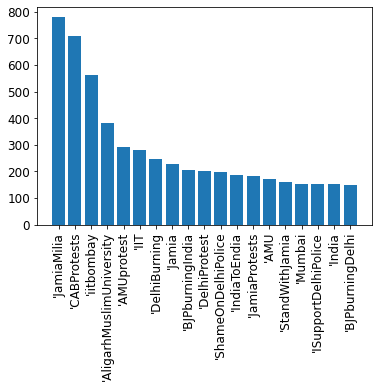

In [143]:
most_freqht2020 = sorted_hashtag2020[6:25]
plt.bar(range(len(most_freqht2020)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht2020)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()